# **SUMUR POTENSIAL TAK HINGGA SATU DIMENSI DASAR TAK RATA**
Islamuddin Alimurrijal

Suatu partikel berada pada sumur potensial tak hingga dan tak rata satu dimensi ditunjukkan pada gambar di bawah ini.

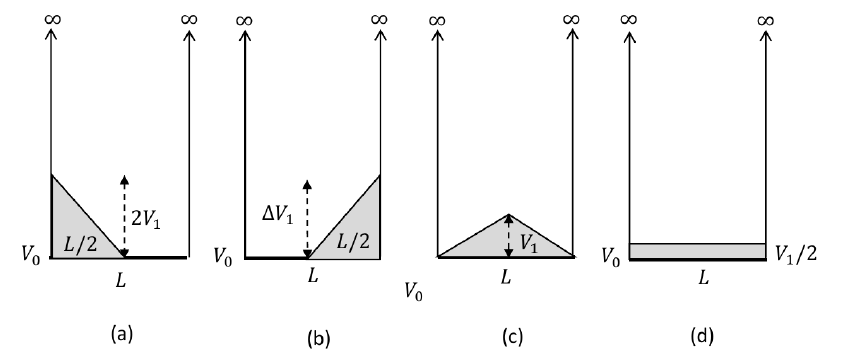


Dimisalkan sumur potensial tersebut memiliki lebar $L=4 ~a.u$ dengan potensial $V_0=0 ~a.u$ dan $V_1=7 ~a.u$, maka permasalahan tersebut dapat diselesaikan secara analitik dan numerik.

##Solusi Analitik

Berdasarkan gambar di atas, terjadi peningkatan potensial sebesar ΔV. Pada gambar (a), (b) dan (c), peningkatan potensial tersebut dapat diasumsikan sebagai luasan segitiga yang dibentuk pada gambar, sedangkan pada gambar (d) diasumsikan sebagai luasan persegi panjang yang dibentuk pada gambar. 

Nilai $\Delta V$ dapat dihitung sebagai berikut:
\begin{align}
\Delta V &= \frac{1}{2} \cdot alas \cdot tinggi \\
&= \frac{1}{2} \cdot \frac{L}{2} \cdot {2V_1} \\
& = \frac{LV_1}{2}
\end{align}


Seluruh gambar memiliki besar $\Delta V$ yang sama.

Energi pada tingkat energi tertentu memenuhi persamaan berikut ini.
\begin{align}
E_n = n^2 \frac{\pi^2 /2}{L^2} + V_0 + \bar{\Delta V}
\end{align}

$\bar{\Delta V}$ merupakan potensial rata-rata sebagai berikut.
\begin{align}
\bar{\Delta V} = \frac{\Delta V}{L} = \frac{LV_1}{2L} = \frac{V_1}{2}
\end{align}

Sehingga persamaan energinya menjadi:
\begin{align}
E_n = n^2 \frac{\pi^2 /2}{L^2} + V_0 + \frac{1}{2}V_1
\end{align}

Persamaan di atas belaku untuk seluruh tingkat energi $n$.

## Solusi Numerik

Solusi numerik permasalahan tersebut dapat dihitung dengan menentukan syarat batas potensial di sepanjang sumur potensial, kemudian menyelesaikan persamaan Schrodinger pada setiap tingkat energi. Implementasi permasalah tersebut secara numerik dapat dilihat pada program di bawah ini dengan mengatur nilai potensial sesuai dengan permasalahan.

In [ ]:
#Import necessary library
import numpy as np
import pandas as pd

In [ ]:
def potential(xmin, xmax):
  '''
  Set the potential within the system in certain interval
  Input   : x interval
  Return  : potential
  '''

  # potential_v = 0
  v1 = 7
  v0 = 0

  # Kasus A
  if (xmin < 0):
    potential_v = v0 + (2*v1)/(xmax) * abs(xmin)
  else:
    potential_v = 0

  # Kasus B
  # if (xmin < 0):
  #   potential_v = 0
  # else:
  #   potential_v = v0 + (2*v1)/(xmax) * abs(xmin)

  # Kasus C
  # if (abs(xmin) < xmax):
  #   potential_v = v1/(xmax) * abs(xmin)
  # else:
  #   potential_v = 0

  # Kasus D
  # potential_v = v1/2

  return potential_v

In [ ]:
def normalize(n, h, psi):
  '''
  Normalize wave function
  Input   : initial wave function, number of points, step
  Return  : normalized wave function
  '''
  norm = psi[0]**2+psi[n]**2
  for i in range(1,n-3,2):
    norm = norm+4*psi[i]**2+2*psi[i+1]**2

  norm = norm + 4*psi[n-1]**2
  norm = 1/np.sqrt((norm*h/3))

  for i in range(0, len(psi)):
   psi[i] = psi[i]*norm

  return psi

In [ ]:
def numerov(nx, x, e_init, psi):
  '''
  Integrates the wave function using Numerov's method
  Input   : number of points, x inteval, initial energy, wave function
  Return  : integrated wave function
  '''

  #Calculates the steps
  h = xmax/nx
  h2 = h**2
  h12 = h2/12

  #Initialize wave function
  psi[0] = 0
  psi[1] = 0.0001

  #Calculates using Numerov's nethod
  fn = 2*(potential(-x, x)-e_init)
  q0 = psi[0]*(1-h12*fn)
  fn = 2*(potential(-x+h, x)-e_init)
  q1 = psi[1]*(1-h12*fn)
  
  for n in range(2, 2*nx+1):
    q2 = h2*fn*psi[n-1]+2*q1-q0
    fn = 2*(potential(n*h-x, x)-e_init)
    psi[n] = q2/(1-h12*fn)
    q0 = q1
    q1 = q2

  psi = normalize(2*nx, h, psi)

  return psi

In [ ]:
def calculates(nx, x, e_init, de, eps, psi):
  '''
  Starting course search and approximate energy level using bisection method
  Input   : number of points, x inteval, initial energy,
            eps, lists to store energy and deviation
  Return  : Energy approximation, wave function
  '''
  #Starting course search
  psi = numerov(nx, x, e_init, psi)
  dev1 = psi[2*nx]

  while True:
    #Update energy with de step
    e2 = e_init + de
 
    psi = numerov(nx, x, e2, psi)
    dev2 = psi[2*nx]

    #Check if deviation is zero
    if dev1*dev2 < 0:
      break

    #Update energy and deviation value for next iteration  
    e_init = e2
    dev1 = dev2

  #Starting bisection
  while abs(e_init-e2) > eps:
    e3 = (e_init+e2)/2
    psi = numerov(nx,x,e3,psi)
    dev3 = psi[2*nx]

    if dev3*dev1 <= 0.000000 :
      e2 = e3
      dev2 = dev3
    else:
      e_init = e3
      dev2 = dev3

  return e3, psi

In [ ]:
def schrod(nx, xmax, e0, de, filename, n):
  '''
  A function to calculates energy and wave function
  Input   : number of points, x interval, initial energy, delta e, filename, energy level
  Return  : approximated energy, psi .date file
  '''
  #Initialize Parameters
  eps = 10e-6
  dx = xmax/nx

  #Initialize wave function
  psi = np.zeros(2*nx+1)

  #Calculates energy and deviation
  energy, psi = calculates(nx, xmax, e0, de, eps, psi)

  #Save output as dat file
  filename = filename + str(n) + '.dat'
  x = np.zeros(2*nx+1)
  for i in range(1, 2*nx+2):
    x[i-1] = (i-1)*dx-xmax
    
  with open(filename, 'w') as out_file:
    for item in range(len(psi)):
      # out_file.write(str(x[item]) + '      ' + (psi[item]) + '\n')
      out_file.write("{}      {}      \n".format(x[item], psi[item]))

  return energy

### Input parameter yang diinginkan

In [ ]:
#Initialize Parameters
nx = 100 #Number of points
xmax = 2 #L = 4 a.u
e0 = 0 #Guessed energy
de = 0.001 #Energy step

energy_level = [i for i in range(1, 11)]
energy_value = []
filename = 'psi-outd' #Change name according to the case

for i in energy_level:
  energy = schrod(nx, xmax, e0, de, filename, i)
  energy_value.append(energy)

  #Update for the next energy level
  e0 = energy + 0.005

In [ ]:
#Make dataframe to store energy

output = pd.DataFrame(columns=['Energy Level', 'Energy (a.u.)'])

for i in range(len(energy_level)):
  output.loc[i] = [energy_level[i], energy_value[i]]

output

,Energy Level,Energy (a.u.)
0,1.0,0.738555
1,2.0,2.829078
2,3.0,5.757383
3,4.0,8.685375
4,5.0,11.731336
5,6.0,15.046687
6,7.0,18.971195
7,8.0,23.499672
8,9.0,28.693695
9,10.0,34.507625


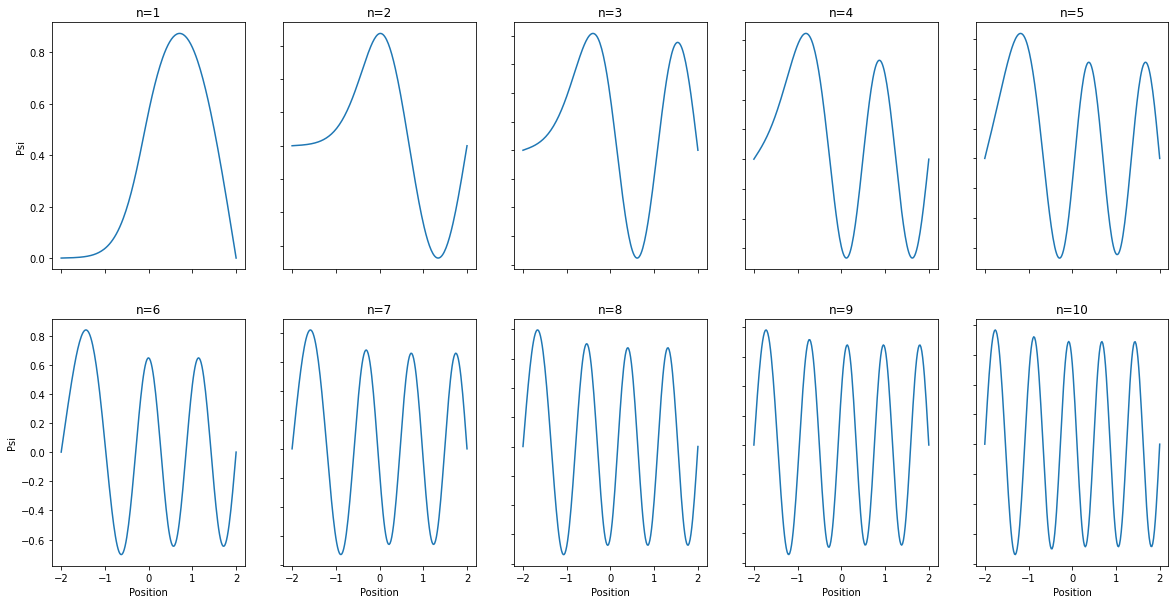

In [ ]:
#Plot wave function
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for n in range(1, 11):
  data = np.loadtxt(filename+str(n)+'.dat', unpack=True)
  x_pos = data[0]
  psii = data[1]

  if n < 6:
    ax[0, n-1].plot(x_pos, psii)
    ax[0, n-1].set_title('n='+ str(n))
  else:
    ax[1, n-6].plot(x_pos, psii)
    ax[1, n-6].set_title('n='+ str(n))

for axis in ax.flat:
  axis.set(xlabel='Position', ylabel='Psi')

for axis in ax.flat:
    axis.label_outer()

plt.show()

### Perhitungan analitik

In [ ]:
#analytical solution
energy_level = [n for n in range(1, 11)]
L = 4
v0 = 0
v1 = 7
energy_analytic = []
analytic = pd.DataFrame(columns=['Energy Level', 'Energy (a.u.)'])

for i in range(len(energy_level)):
  e = (energy_level[i]**2 * (((np.pi**2)/2)/L**2)) + v0 + (v1/2)
  analytic.loc[i] = [energy_level[i], e]

analytic

,Energy Level,Energy (a.u.)
0,1.0,3.808425
1,2.0,4.733701
2,3.0,6.275826
3,4.0,8.434802
4,5.0,11.210628
5,6.0,14.603305
6,7.0,18.612832
7,8.0,23.239209
8,9.0,28.482436
9,10.0,34.342514


### **Download Output Files**

In [ ]:
# !rm * #Delete all files

In [ ]:
from google.colab import files

file_name = 'psi-out'
case_name = ['a', 'b', 'c', 'd']

for case in case_name:
  for n in energy_level:
    files.download('/content/psi-out'+case+str(n)+'.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>